# **Análise de Séries Temporais - IBMEC**

**Carlos Eduardo Britto Cunha**


# **Exercício 1 - Obtendo dados da Cripto Moeda BITCOIN**

In [1]:
# Instalando o yahoo finance e outros pacotes
!pip install yfinance --upgrade --no-cache-dir

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 17.4 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [2]:
!pip install requests --upgrade --no-cache-dir

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
pip install --upgrade pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
# Importando os pacotes necessários
import pandas as pd
import numpy as np
import yfinance as yf #Instalando e importando a API no código
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA

In [5]:
codigo = ['BTC-USD']
df = yf.download(codigo[0],
                start= '2021-12-01',
                end= '2022-01-31',
                group_by="ticker"); #";" serve para não exibir os dados

[*********************100%***********************]  1 of 1 completed


In [7]:
with pd.option_context('display.max_rows',10):
  print(df)

                    Open          High           Low         Close  \
Date                                                                 
2021-12-01  56907.964844  59041.683594  56553.082031  57229.828125   
2021-12-02  57217.371094  57349.234375  55895.132812  56477.816406   
2021-12-03  56509.164062  57482.167969  52496.585938  53598.246094   
2021-12-04  53727.878906  53904.679688  42874.617188  49200.703125   
2021-12-05  49201.519531  49768.148438  47857.496094  49368.847656   
...                  ...           ...           ...           ...   
2022-01-26  36950.515625  38825.410156  36374.906250  36852.121094   
2022-01-27  36841.878906  37148.324219  35629.281250  37138.234375   
2022-01-28  37128.445312  37952.878906  36211.109375  37784.332031   
2022-01-29  37780.714844  38576.261719  37406.472656  38138.179688   
2022-01-30  38151.917969  38266.339844  37437.710938  37917.601562   

               Adj Close       Volume  
Date                                   
2021-12-0

# **Importação dos dados**

In [8]:
import pandas as pd
import matplotlib.pylab as plt
import yfinance as yf
import warnings
import matplotlib
import statsmodels.api as sm

In [9]:
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
matplotlib.rcParams['axes.labelsize'] = 2
matplotlib.rcParams['xtick.labelsize'] = 2
matplotlib.rcParams['ytick.labelsize'] = 2
matplotlib.rcParams['text.color'] = 'G'

In [10]:
# importar pacotes necessários
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
dados_series = yf.download("BTC-USD", start="2021-12-01", end="2022-01-31")

[*********************100%***********************]  1 of 1 completed


In [12]:
with pd.option_context('display.max_rows',10):
  print(dados_series)

                    Open          High           Low         Close  \
Date                                                                 
2021-12-01  56907.964844  59041.683594  56553.082031  57229.828125   
2021-12-02  57217.371094  57349.234375  55895.132812  56477.816406   
2021-12-03  56509.164062  57482.167969  52496.585938  53598.246094   
2021-12-04  53727.878906  53904.679688  42874.617188  49200.703125   
2021-12-05  49201.519531  49768.148438  47857.496094  49368.847656   
...                  ...           ...           ...           ...   
2022-01-26  36950.515625  38825.410156  36374.906250  36852.121094   
2022-01-27  36841.878906  37148.324219  35629.281250  37138.234375   
2022-01-28  37128.445312  37952.878906  36211.109375  37784.332031   
2022-01-29  37780.714844  38576.261719  37406.472656  38138.179688   
2022-01-30  38151.917969  38266.339844  37437.710938  37917.601562   

               Adj Close       Volume  
Date                                   
2021-12-0

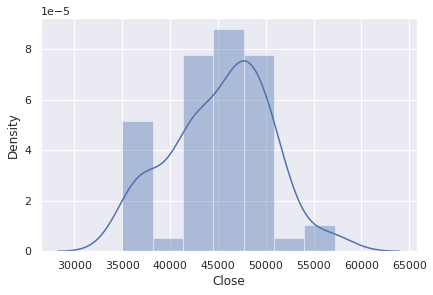

In [15]:
import seaborn as sns
sns.set_theme(style="darkgrid")
sns.distplot(dados_series['Close'].dropna(),kde=True)

In [16]:
import plotly.io as pio
pio.renderers

Renderers configuration
-----------------------
    Default renderer: 'colab'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery', 'sphinx_gallery_png']

In [17]:
import plotly.offline as py
import plotly.graph_objs as go
dados_grafico = [go.Scatter(x=dados_series.index, y=dados_series['Close'])]
py.iplot(dados_grafico)

# **Exercício 2 - Decomposições Aditiva e Multuplicativa**

In [18]:
#Selecionar apenas os dados referentes ao preço de fechamento
df = dados_series.drop(['Open','High', 'Low', 'Adj Close', 'Volume'], axis=1) 

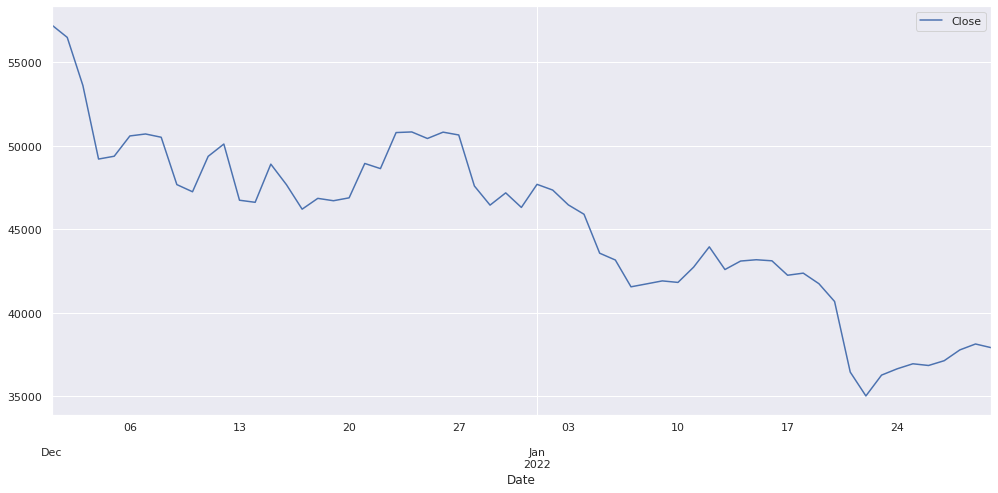

In [20]:
df.plot(figsize = (15, 7)) 
plt.show()

In [21]:
with pd.option_context('display.max_rows',10):
  print(df)

                   Close
Date                    
2021-12-01  57229.828125
2021-12-02  56477.816406
2021-12-03  53598.246094
2021-12-04  49200.703125
2021-12-05  49368.847656
...                  ...
2022-01-26  36852.121094
2022-01-27  37138.234375
2022-01-28  37784.332031
2022-01-29  38138.179688
2022-01-30  37917.601562

[61 rows x 1 columns]


In [22]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 7

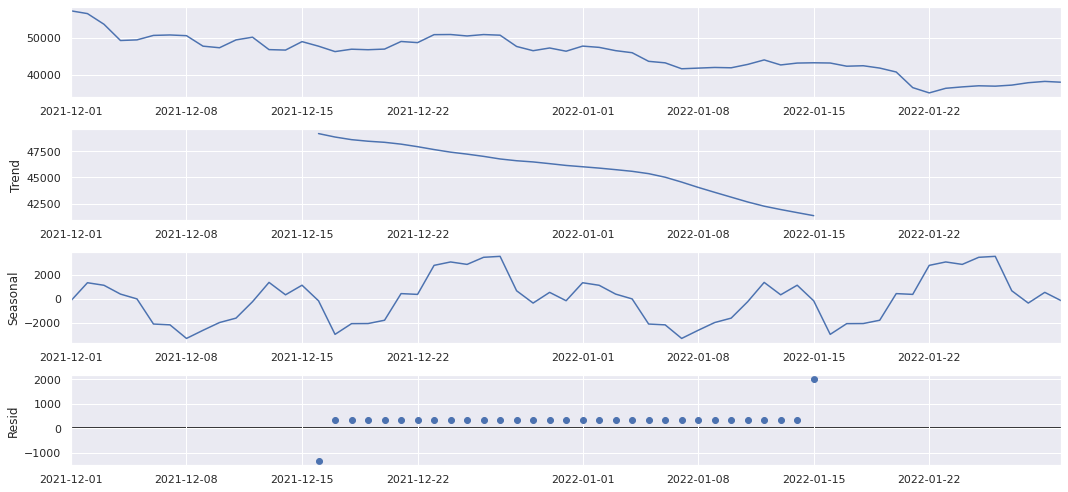

In [23]:
decomposition = sm.tsa.seasonal_decompose(x=df, freq=30, model='additive')
fig = decomposition.plot()
plt.show()

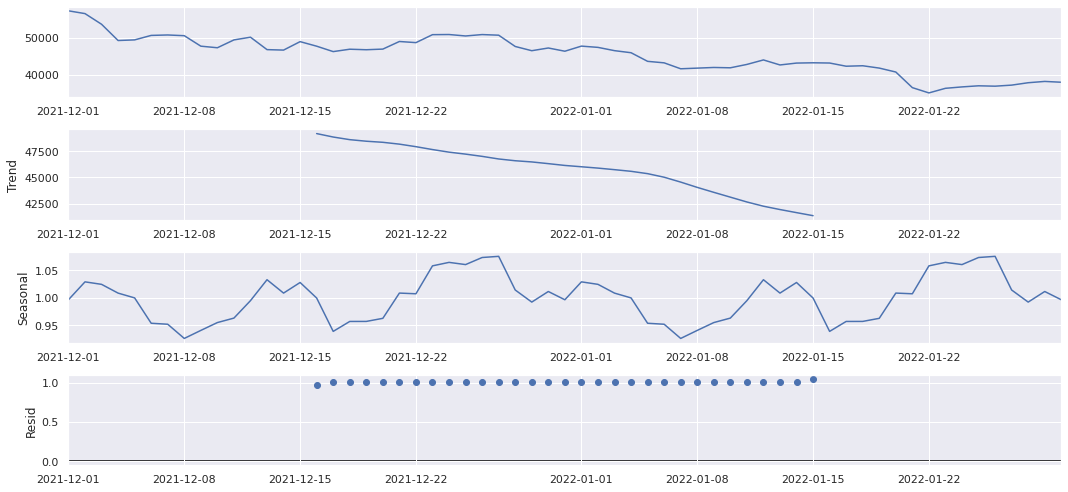

In [24]:
decomposition = sm.tsa.seasonal_decompose(x=df, freq=30, model='multiplicative')
fig = decomposition.plot()
plt.show()

# **Exercício 3 - Modelos de Médias Móveis (Suavização)**

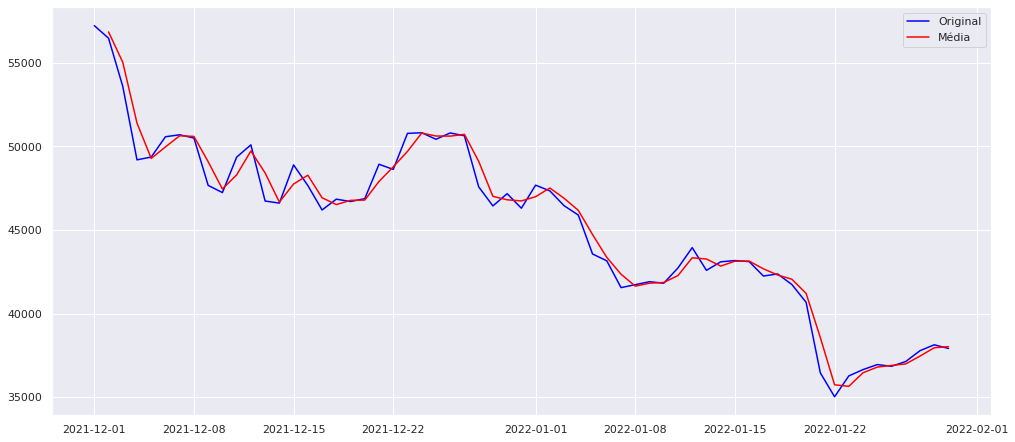

In [25]:
mm = pd.DataFrame.rolling(df,window=2,center=False).mean()
orig = plt.plot(df, color='blue',label='Original')
mean = plt.plot(mm, color='red',label='Média')
plt.legend(loc='best')
plt.show()

In [26]:
# aplica o método para obter previsões para até 12 passos à frente (horizonte)
def medias_moveis(series, n):
    '''
        Calcula a média da últimas n observações
    '''
    return np.average(series[-n:])

In [27]:
medias_moveis(df, 12) # Previsão 12 passos à frente

37635.659830729164

# **Exercício 4 - Aplicação do método ARIMA(p,q,d)**

In [29]:
with pd.option_context('display.max_rows',6):
  print(df)

                   Close
Date                    
2021-12-01  57229.828125
2021-12-02  56477.816406
2021-12-03  53598.246094
...                  ...
2022-01-28  37784.332031
2022-01-29  38138.179688
2022-01-30  37917.601562

[61 rows x 1 columns]


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 61 entries, 2021-12-01 to 2022-01-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   61 non-null     float64
dtypes: float64(1)
memory usage: 976.0 bytes


In [31]:
import statsmodels.api as sm

In [32]:
pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 7.5 MB/s 
     |████████████████████████████████| 9.9 MB 43.0 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [35]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(df, 
                          trace=True,
                          suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1037.300, Time=0.30 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1044.315, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1046.419, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1048.310, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1045.372, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1042.587, Time=0.10 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1039.315, Time=0.18 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=1037.350, Time=0.21 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=1037.578, Time=0.49 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1046.108, Time=0.15 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=1038.486, Time=0.15 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=1037.432, Time=0.09 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=1038.653, Time=0.24 sec

Best model:  ARIMA(2,1,2)(0,0,0)[0] i

In [36]:
dados_treinamento, dados_teste = df[0:int(len(df)*0.7)], df[int(len(df)*0.7):]
dados_treinamento = dados_treinamento['Close'].values
dados_teste = dados_teste['Close'].values
historico = [x for x in dados_treinamento]
modelo_preditivo = []

In [39]:
from statsmodels.tsa.arima.model import ARIMA
modelo = ARIMA(df, order=(2,1,3))
modelo_fit = modelo.fit()
print(modelo_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                   61
Model:                 ARIMA(2, 1, 3)   Log Likelihood                -515.380
Date:                Sun, 13 Nov 2022   AIC                           1042.759
Time:                        18:59:23   BIC                           1055.325
Sample:                    12-01-2021   HQIC                          1047.675
                         - 01-30-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8569      0.032    -26.698      0.000      -0.920      -0.794
ar.L2         -0.8821      0.026    -33.290      0.000      -0.934      -0.830
ma.L1          0.8849      0.080     11.084      0.0

In [40]:
modelo_fit.predict()

2021-12-01        0.000000
2021-12-02    57109.475020
2021-12-03    56190.075804
2021-12-04    51724.341499
2021-12-05    51137.632904
                  ...     
2022-01-26    36836.927159
2022-01-27    37060.716671
2022-01-28    37035.413339
2022-01-29    37702.260590
2022-01-30    38322.728790
Freq: D, Name: predicted_mean, Length: 61, dtype: float64

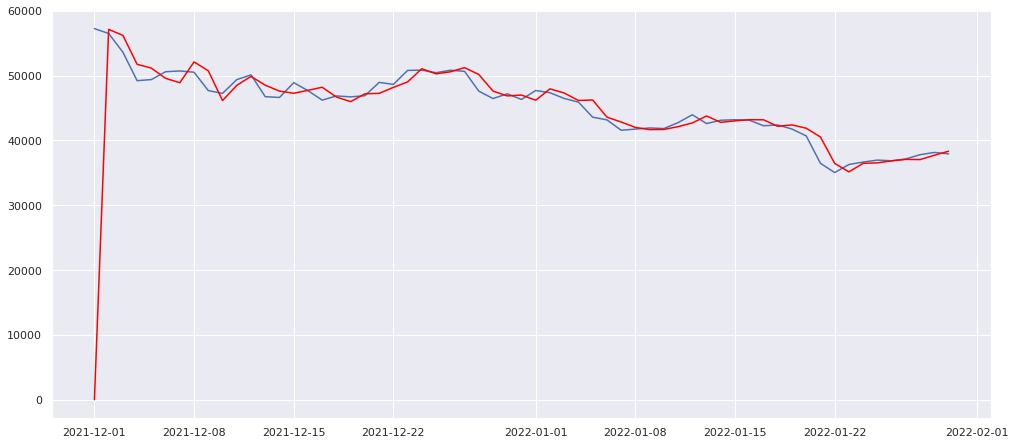

In [42]:
inicio=0
fim=len(df)-1
predicoes=modelo_fit.predict(start=0,
                         end=fim).rename('Predições ARIMA')

plt.plot(df)
plt.plot(predicoes,color='red')

In [43]:
predicoes=modelo_fit.predict(fim+1)
print(predicoes)

2022-01-31    37786.04341
Freq: D, dtype: float64


In [45]:
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

In [46]:
n=100
periodo = np.arange(n)
#seguindo a distribuição normal
y_teste = np.random.standard_normal(n) 
#perturbação de y_teste
y_pred = y_teste +0.5*np.random.standard_normal(n)

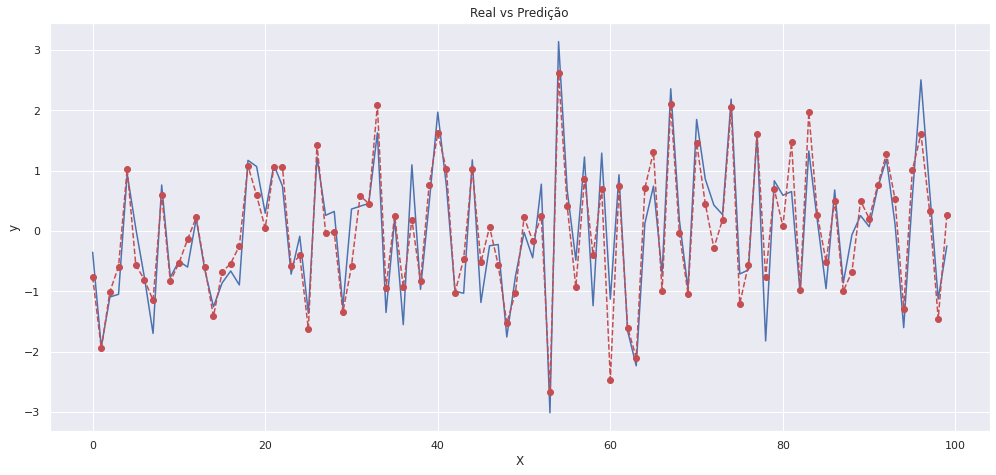

In [47]:
plt.figure(figsize=(15, 7))
plt.plot(periodo, y_pred)
plt.plot(periodo, y_teste, 'ro--')
plt.title('Real vs Predição')
plt.xlabel('X')
plt.ylabel('y')

plt.show()

In [49]:
print('MSE:', metrics.mean_squared_error(y_teste, y_pred))

MSE: 0.17631170218758854
